In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("D:\\JupyterNotebooks\\data\\glass.csv")

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


c:\Users\Admin\miniconda3\envs\py_310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

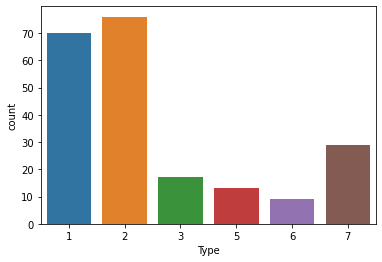

In [6]:
sns.countplot(df['Type'])

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [15]:
pipe = Pipeline(steps=[('Sscaler', StandardScaler()), ('rfc', RandomForestClassifier())])

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Type', axis=1)
y = df['Type']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=21)

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Sscaler', StandardScaler()),
                ('rfc', RandomForestClassifier())])

In [32]:
normal_pred = pipe.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
print(classification_report(y_test, normal_pred))

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

In [42]:
bal_X_train, bal_X_test, bal_y_train, bal_y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=21)

In [43]:
pipe.fit(bal_X_train,bal_y_train)

Pipeline(steps=[('Sscaler', StandardScaler()),
                ('rfc', RandomForestClassifier())])

In [45]:
balanced_pred = pipe.predict(bal_X_test)

In [48]:
print(classification_report(bal_y_test, balanced_pred))

              precision    recall  f1-score   support

           1       0.76      0.81      0.79        16
           2       0.83      0.50      0.62        10
           3       0.80      0.89      0.84         9
           5       0.92      0.92      0.92        13
           6       1.00      1.00      1.00         9
           7       0.86      1.00      0.92        12

    accuracy                           0.86        69
   macro avg       0.86      0.85      0.85        69
weighted avg       0.86      0.86      0.85        69



<AxesSubplot:>

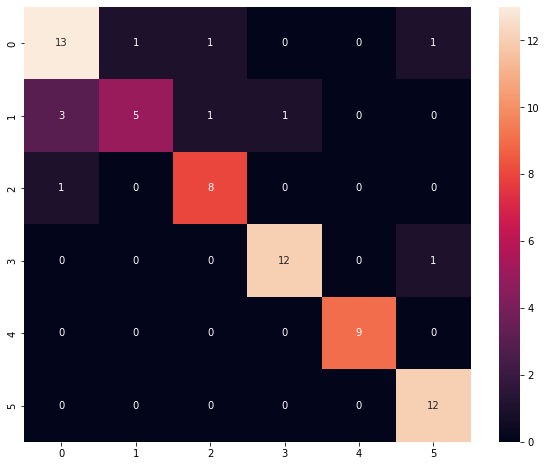

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(bal_y_test, balanced_pred), annot=True)

In [62]:
import pickle

In [64]:
with open("D:\\JupyterNotebooks\\Saved_models\\glass_pred.pkl", "wb") as f:
    pickle.dump(pipe[1], f)

c:\Users\Admin\miniconda3\envs\py_310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

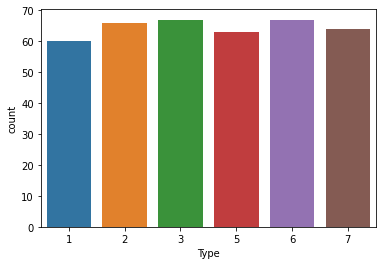

In [66]:
sns.countplot(bal_y_train)